In [13]:
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2 
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.applications.densenet import DenseNet169
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.nasnet import NASNetMobile, NASNetLarge
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.layers import Input, Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam, SGD, Adagrad, Adadelta
from tensorflow.keras import backend as K
from imutils import paths
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import argparse
import imutils
import random
import pickle
import cv2
import os

In [14]:
dataset_path = 'dataset_animals'
model_path = os.path.sep.join(['output3', 'animal.model'])
le_path = os.path.sep.join(['output3', 'le.pickle'])


In [15]:
EPOCHS = 50
INIT_LR = 1e-4
BS = 32
IMAGE_DIMS =  (224, 224, 3)

In [16]:
data = []
labels = []

In [17]:
imagePaths = sorted(list(paths.list_images(dataset_path)))
random.seed(0)
random.shuffle(imagePaths)


In [18]:
dic = {'australianbee':'Australian Bee', 'bluetonguedlizard':'Blue Tongued Lizard', 'carpetpython':'Carpet Python',
      'centralbeardeddragon': 'Central Bearded Dragon', 'europeanwasp':'European Wasp', 'longlegsspider': 'Long Legs Spider',
      'lowlandcopperhead': 'Lowland Copperhead', 'redback': 'Redback Spider', 'redbelliedblacksnake': 'Red Bellied Black Snake',
      'tarantula': 'Tarantula'}
print(dic)

{'australianbee': 'Australian Bee', 'bluetonguedlizard': 'Blue Tongued Lizard', 'carpetpython': 'Carpet Python', 'centralbeardeddragon': 'Central Bearded Dragon', 'europeanwasp': 'European Wasp', 'longlegsspider': 'Long Legs Spider', 'lowlandcopperhead': 'Lowland Copperhead', 'redback': 'Redback Spider', 'redbelliedblacksnake': 'Red Bellied Black Snake', 'tarantula': 'Tarantula'}


In [19]:
for imagePath in imagePaths:
    # load the image, pre-process it, and store it in the data list
    assert os.path.isfile(imagePath)
    image = cv2.imread(imagePath)
    image = cv2.resize(image, (IMAGE_DIMS[1], IMAGE_DIMS[0]))
    image = img_to_array(image)
    data.append(image)

    # extract the class label from the image path and update the labels list
    label = imagePath.split(os.path.sep)[-1]
    label = label.split('-')[0]
    label = dic[label]
    labels.append(label)
    print(label)

Blue Tongued Lizard
Tarantula
Blue Tongued Lizard
Central Bearded Dragon
European Wasp
Redback Spider
Carpet Python
Lowland Copperhead
Central Bearded Dragon
Redback Spider
European Wasp
European Wasp
European Wasp
Blue Tongued Lizard
Long Legs Spider
European Wasp
Australian Bee
Central Bearded Dragon
Central Bearded Dragon
Lowland Copperhead
Carpet Python
Long Legs Spider
Australian Bee
Australian Bee
Long Legs Spider
Long Legs Spider
Long Legs Spider
Long Legs Spider
Blue Tongued Lizard
Redback Spider
Tarantula
Australian Bee
European Wasp
Red Bellied Black Snake
Australian Bee
Long Legs Spider
Long Legs Spider
Lowland Copperhead
Central Bearded Dragon
Redback Spider
Red Bellied Black Snake
Red Bellied Black Snake
Redback Spider
Tarantula
Long Legs Spider
Long Legs Spider
Lowland Copperhead
Carpet Python
Carpet Python
Carpet Python
Tarantula
Lowland Copperhead
Australian Bee
Lowland Copperhead
Red Bellied Black Snake
Lowland Copperhead
Blue Tongued Lizard
Carpet Python
Long Legs Spi

Australian Bee
Red Bellied Black Snake
Central Bearded Dragon
Red Bellied Black Snake
Central Bearded Dragon
Red Bellied Black Snake
Long Legs Spider
Carpet Python
Carpet Python
Redback Spider
Carpet Python
Central Bearded Dragon
European Wasp
Australian Bee
Central Bearded Dragon
Lowland Copperhead
Long Legs Spider
Blue Tongued Lizard
Red Bellied Black Snake
Redback Spider
Redback Spider
Long Legs Spider
Blue Tongued Lizard
Central Bearded Dragon
Long Legs Spider
Redback Spider
European Wasp
European Wasp
Carpet Python
Carpet Python
Australian Bee
Blue Tongued Lizard
Blue Tongued Lizard
Blue Tongued Lizard
Blue Tongued Lizard
Long Legs Spider
European Wasp
Lowland Copperhead
Tarantula
Redback Spider
European Wasp
Long Legs Spider
European Wasp
Australian Bee
Redback Spider
Redback Spider
Long Legs Spider
Lowland Copperhead
Long Legs Spider
Carpet Python
Australian Bee
European Wasp
Blue Tongued Lizard
Central Bearded Dragon
Redback Spider
Red Bellied Black Snake
Redback Spider
Redback

Australian Bee
Carpet Python
Redback Spider
Tarantula
European Wasp
Long Legs Spider
Blue Tongued Lizard
European Wasp
Carpet Python
Lowland Copperhead
Central Bearded Dragon
Blue Tongued Lizard
Central Bearded Dragon
Redback Spider
Carpet Python
Long Legs Spider
Redback Spider
Red Bellied Black Snake
Redback Spider
Long Legs Spider
Tarantula
Long Legs Spider
Long Legs Spider
Blue Tongued Lizard
Australian Bee
Blue Tongued Lizard
Lowland Copperhead
European Wasp
Long Legs Spider
European Wasp
Carpet Python
Red Bellied Black Snake
Carpet Python
Lowland Copperhead
Lowland Copperhead
Lowland Copperhead
Tarantula
Tarantula
Long Legs Spider
Redback Spider
Blue Tongued Lizard
Tarantula
Carpet Python
Lowland Copperhead
European Wasp
Australian Bee
Blue Tongued Lizard
Carpet Python
Redback Spider
Long Legs Spider
Lowland Copperhead
Red Bellied Black Snake
Central Bearded Dragon
Lowland Copperhead
Central Bearded Dragon
Tarantula
European Wasp
Redback Spider
Tarantula
Redback Spider
Tarantula
R

Australian Bee
Australian Bee
Australian Bee
Lowland Copperhead
Redback Spider
Long Legs Spider
Long Legs Spider
Blue Tongued Lizard
Blue Tongued Lizard
Lowland Copperhead
Red Bellied Black Snake
Central Bearded Dragon
Australian Bee
European Wasp
European Wasp
Red Bellied Black Snake
Redback Spider
Red Bellied Black Snake
Red Bellied Black Snake
Central Bearded Dragon
Central Bearded Dragon
European Wasp
European Wasp
Redback Spider
Blue Tongued Lizard
Blue Tongued Lizard
European Wasp
Central Bearded Dragon
Central Bearded Dragon
Central Bearded Dragon
Redback Spider
Australian Bee
Redback Spider
Long Legs Spider
Blue Tongued Lizard
Central Bearded Dragon
Australian Bee
Red Bellied Black Snake
Redback Spider
European Wasp
Redback Spider
Central Bearded Dragon
Blue Tongued Lizard
Redback Spider
Central Bearded Dragon
Central Bearded Dragon
Central Bearded Dragon
Tarantula
Tarantula
Blue Tongued Lizard
Carpet Python
Australian Bee
Australian Bee
Red Bellied Black Snake
Central Bearded 

Tarantula
Central Bearded Dragon
European Wasp
European Wasp
Carpet Python
Australian Bee
European Wasp
Red Bellied Black Snake
Redback Spider
Central Bearded Dragon
Red Bellied Black Snake


In [20]:
data = np.array(data, dtype="float") / 255.0
labels = np.array(labels)
print("data matrix: {:.2f}MB".format(data.nbytes / (1024 * 1000.0)))

# binarize the labels
lb = LabelBinarizer()
labels = lb.fit_transform(labels)

# partition the data into training and testing splits using 75% of the data for training and the remaining 20% for testing
(trainX, testX, trainY, testY) = train_test_split(data, labels, random_state=0, stratify=labels)

data matrix: 2322.60MB


In [21]:
aug = ImageDataGenerator(rotation_range=25, width_shift_range=0.1, height_shift_range=0.1, 
                         shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

In [22]:
def train_MobileNetV2():
   
    # create a custom input layer that accepts images of shape IMAGE_DIMS
    input_tensor = Input(shape=IMAGE_DIMS)
    
    # grab the Keras built-in model for transfer learning
    base_model = MobileNetV2(
            include_top=False,
            weights='imagenet',
            input_tensor=input_tensor,
            input_shape=IMAGE_DIMS,
            pooling='avg')
    
    # original model is trained on different dataset with different number of classes
    # so we need to append our own output layer
    output_tensor = Dense(10, activation='softmax')(base_model.output)
    
    model = Model(inputs=input_tensor, outputs=output_tensor)
    
    model.compile(Adam(lr=1e-4), loss="categorical_crossentropy", metrics=['accuracy', 'top_k_categorical_accuracy'])
    
    h = model.fit_generator(
            aug.flow(trainX, trainY, batch_size=BS),
            validation_data=(testX, testY),
            steps_per_epoch=len(trainX) // BS,
            epochs=50, verbose=1)
    
#         Y_test = np.argmax(testY, axis=1) # Convert one-hot to index
#         y_pred = model.predict(testX)
#         # print(y_pred)
#         y_pred = np.argmax(y_pred, axis=1)
#         print(classification_report(Y_test, y_pred, target_names=list(lb.classes_)))

    return h

history_mobilenetv2 = train_MobileNetV2()

Epoch 1/50
46/46 [==============================] - 148s 3s/step - loss: 1.1113 - accuracy: 0.6322 - top_k_categorical_accuracy: 0.9179 - val_loss: 0.9139 - val_accuracy: 0.6923 - val_top_k_categorical_accuracy: 0.9676
Epoch 2/50
46/46 [==============================] - 131s 3s/step - loss: 0.3465 - accuracy: 0.9034 - top_k_categorical_accuracy: 0.9986 - val_loss: 0.8171 - val_accuracy: 0.7409 - val_top_k_categorical_accuracy: 0.9798
Epoch 3/50
46/46 [==============================] - 127s 3s/step - loss: 0.1967 - accuracy: 0.9441 - top_k_categorical_accuracy: 1.0000 - val_loss: 0.6938 - val_accuracy: 0.7692 - val_top_k_categorical_accuracy: 0.9858
Epoch 4/50
46/46 [==============================] - 123s 3s/step - loss: 0.1357 - accuracy: 0.9634 - top_k_categorical_accuracy: 1.0000 - val_loss: 0.7135 - val_accuracy: 0.7611 - val_top_k_categorical_accuracy: 0.9838
Epoch 5/50
46/46 [==============================] - 124s 3s/step - loss: 0.1102 - accuracy: 0.9710 - top_k_categorical_accur

46/46 [==============================] - 127s 3s/step - loss: 0.0156 - accuracy: 0.9945 - top_k_categorical_accuracy: 1.0000 - val_loss: 0.4134 - val_accuracy: 0.9049 - val_top_k_categorical_accuracy: 0.9960
Epoch 39/50
46/46 [==============================] - 127s 3s/step - loss: 0.0180 - accuracy: 0.9972 - top_k_categorical_accuracy: 1.0000 - val_loss: 0.4433 - val_accuracy: 0.8988 - val_top_k_categorical_accuracy: 0.9960
Epoch 40/50
46/46 [==============================] - 127s 3s/step - loss: 0.0194 - accuracy: 0.9924 - top_k_categorical_accuracy: 1.0000 - val_loss: 0.4391 - val_accuracy: 0.9089 - val_top_k_categorical_accuracy: 0.9919
Epoch 41/50
46/46 [==============================] - 127s 3s/step - loss: 0.0092 - accuracy: 0.9965 - top_k_categorical_accuracy: 1.0000 - val_loss: 0.4035 - val_accuracy: 0.9190 - val_top_k_categorical_accuracy: 0.9939
Epoch 42/50
46/46 [==============================] - 127s 3s/step - loss: 0.0247 - accuracy: 0.9924 - top_k_categorical_accuracy: 1.

In [23]:
def train_Resnet50():
   
    # create a custom input layer that accepts images of shape IMAGE_DIMS
    input_tensor = Input(shape=IMAGE_DIMS)
    
    # grab the Keras built-in model for transfer learning
    base_model = ResNet50(
            include_top=False,
            weights='imagenet',
            input_tensor=input_tensor,
            input_shape=IMAGE_DIMS,
            pooling='avg')
    
    # original model is trained on different dataset with different number of classes
    # so we need to append our own output layer
    output_tensor = Dense(10, activation='softmax')(base_model.output)
    
    model = Model(inputs=input_tensor, outputs=output_tensor)
    
    model.compile(Adam(lr=1e-4), loss="categorical_crossentropy", metrics=['accuracy', 'top_k_categorical_accuracy'])
    
    h = model.fit_generator(
            aug.flow(trainX, trainY, batch_size=BS),
            validation_data=(testX, testY),
            steps_per_epoch=len(trainX) // BS,
            epochs=50, verbose=1)
    
#         Y_test = np.argmax(testY, axis=1) # Convert one-hot to index
#         y_pred = model.predict(testX)
#         # print(y_pred)
#         y_pred = np.argmax(y_pred, axis=1)
#         print(classification_report(Y_test, y_pred, target_names=list(lb.classes_)))

    return h

history_resnet50 = train_Resnet50()

Epoch 1/50
46/46 [==============================] - 287s 6s/step - loss: 0.7337 - accuracy: 0.7564 - top_k_categorical_accuracy: 0.9558 - val_loss: 2.6075 - val_accuracy: 0.0729 - val_top_k_categorical_accuracy: 0.4960
Epoch 2/50
46/46 [==============================] - 288s 6s/step - loss: 0.1540 - accuracy: 0.9565 - top_k_categorical_accuracy: 1.0000 - val_loss: 2.5655 - val_accuracy: 0.0830 - val_top_k_categorical_accuracy: 0.5020
Epoch 3/50
46/46 [==============================] - 289s 6s/step - loss: 0.0927 - accuracy: 0.9703 - top_k_categorical_accuracy: 0.9986 - val_loss: 2.5901 - val_accuracy: 0.1235 - val_top_k_categorical_accuracy: 0.5121
Epoch 4/50
46/46 [==============================] - 289s 6s/step - loss: 0.0756 - accuracy: 0.9779 - top_k_categorical_accuracy: 1.0000 - val_loss: 2.6939 - val_accuracy: 0.1215 - val_top_k_categorical_accuracy: 0.5040
Epoch 5/50
46/46 [==============================] - 288s 6s/step - loss: 0.0392 - accuracy: 0.9869 - top_k_categorical_accur

46/46 [==============================] - 286s 6s/step - loss: 0.0214 - accuracy: 0.9924 - top_k_categorical_accuracy: 1.0000 - val_loss: 0.3960 - val_accuracy: 0.9251 - val_top_k_categorical_accuracy: 1.0000
Epoch 39/50
46/46 [==============================] - 285s 6s/step - loss: 0.0165 - accuracy: 0.9938 - top_k_categorical_accuracy: 1.0000 - val_loss: 0.4432 - val_accuracy: 0.9069 - val_top_k_categorical_accuracy: 0.9980
Epoch 40/50
46/46 [==============================] - 286s 6s/step - loss: 0.0280 - accuracy: 0.9945 - top_k_categorical_accuracy: 0.9993 - val_loss: 0.5453 - val_accuracy: 0.9008 - val_top_k_categorical_accuracy: 0.9919
Epoch 41/50
46/46 [==============================] - 286s 6s/step - loss: 0.0111 - accuracy: 0.9965 - top_k_categorical_accuracy: 1.0000 - val_loss: 0.5333 - val_accuracy: 0.8947 - val_top_k_categorical_accuracy: 0.9939
Epoch 42/50
46/46 [==============================] - 285s 6s/step - loss: 0.0271 - accuracy: 0.9924 - top_k_categorical_accuracy: 1.

In [24]:
def train_Xception():
   
    # create a custom input layer that accepts images of shape IMAGE_DIMS
    input_tensor = Input(shape=IMAGE_DIMS)
    
    # grab the Keras built-in model for transfer learning
    base_model = InceptionV3(
            include_top=False,
            weights='imagenet',
            input_tensor=input_tensor,
            input_shape=IMAGE_DIMS,
            pooling='avg')
    
    # original model is trained on different dataset with different number of classes
    # so we need to append our own output layer
    output_tensor = Dense(10, activation='softmax')(base_model.output)
    
    model = Model(inputs=input_tensor, outputs=output_tensor)
    
    model.compile(Adam(lr=1e-4), loss="categorical_crossentropy", metrics=['accuracy', 'top_k_categorical_accuracy'])
    
    h = model.fit_generator(
            aug.flow(trainX, trainY, batch_size=BS),
            validation_data=(testX, testY),
            steps_per_epoch=len(trainX) // BS,
            epochs=50, verbose=1)
    
#         Y_test = np.argmax(testY, axis=1) # Convert one-hot to index
#         y_pred = model.predict(testX)
#         # print(y_pred)
#         y_pred = np.argmax(y_pred, axis=1)
#         print(classification_report(Y_test, y_pred, target_names=list(lb.classes_)))

    return h

history_Xception = train_Xception()

Epoch 1/50
46/46 [==============================] - 167s 4s/step - loss: 0.8927 - accuracy: 0.7122 - top_k_categorical_accuracy: 0.9400 - val_loss: 0.3813 - val_accuracy: 0.8745 - val_top_k_categorical_accuracy: 0.9980
Epoch 2/50
46/46 [==============================] - 168s 4s/step - loss: 0.2620 - accuracy: 0.9103 - top_k_categorical_accuracy: 0.9959 - val_loss: 0.2775 - val_accuracy: 0.9190 - val_top_k_categorical_accuracy: 0.9960
Epoch 3/50
46/46 [==============================] - 168s 4s/step - loss: 0.1508 - accuracy: 0.9586 - top_k_categorical_accuracy: 1.0000 - val_loss: 0.2541 - val_accuracy: 0.9231 - val_top_k_categorical_accuracy: 0.9980
Epoch 4/50
46/46 [==============================] - 167s 4s/step - loss: 0.0822 - accuracy: 0.9724 - top_k_categorical_accuracy: 1.0000 - val_loss: 0.2781 - val_accuracy: 0.9211 - val_top_k_categorical_accuracy: 0.9980
Epoch 5/50
46/46 [==============================] - 168s 4s/step - loss: 0.0775 - accuracy: 0.9772 - top_k_categorical_accur

46/46 [==============================] - 169s 4s/step - loss: 0.0223 - accuracy: 0.9945 - top_k_categorical_accuracy: 1.0000 - val_loss: 0.4147 - val_accuracy: 0.9190 - val_top_k_categorical_accuracy: 0.9919
Epoch 39/50
46/46 [==============================] - 169s 4s/step - loss: 0.0245 - accuracy: 0.9931 - top_k_categorical_accuracy: 1.0000 - val_loss: 0.4136 - val_accuracy: 0.9190 - val_top_k_categorical_accuracy: 0.9960
Epoch 40/50
46/46 [==============================] - 169s 4s/step - loss: 0.0251 - accuracy: 0.9910 - top_k_categorical_accuracy: 1.0000 - val_loss: 0.5916 - val_accuracy: 0.8988 - val_top_k_categorical_accuracy: 0.9899
Epoch 41/50
46/46 [==============================] - 169s 4s/step - loss: 0.0390 - accuracy: 0.9869 - top_k_categorical_accuracy: 1.0000 - val_loss: 0.4398 - val_accuracy: 0.9150 - val_top_k_categorical_accuracy: 0.9980
Epoch 42/50
46/46 [==============================] - 169s 4s/step - loss: 0.0430 - accuracy: 0.9834 - top_k_categorical_accuracy: 1.

In [25]:
#f = open(le_path, "wb")
#f.write(pickle.dumps(lb))
#f.close()

In [30]:
def train_Xception_true():
   
    # create a custom input layer that accepts images of shape IMAGE_DIMS
    input_tensor = Input(shape=IMAGE_DIMS)
    
    # grab the Keras built-in model for transfer learning
    base_model = Xception(
            include_top=False,
            weights='imagenet',
            input_tensor=input_tensor,
            input_shape=IMAGE_DIMS,
            pooling='avg')
    
    # original model is trained on different dataset with different number of classes
    # so we need to append our own output layer
    output_tensor = Dense(10, activation='softmax')(base_model.output)
    
    model = Model(inputs=input_tensor, outputs=output_tensor)
    
    model.compile(Adam(lr=1e-4), loss="categorical_crossentropy", metrics=['accuracy', 'top_k_categorical_accuracy'])
    
    h = model.fit_generator(
            aug.flow(trainX, trainY, batch_size=BS),
            validation_data=(testX, testY),
            steps_per_epoch=len(trainX) // BS,
            epochs=50, verbose=1)
    
#         Y_test = np.argmax(testY, axis=1) # Convert one-hot to index
#         y_pred = model.predict(testX)
#         # print(y_pred)
#         y_pred = np.argmax(y_pred, axis=1)
#         print(classification_report(Y_test, y_pred, target_names=list(lb.classes_)))

    return h

history_Xception_true = train_Xception_true()

83689472/83683744 [==============================] - 7s 0us/step
Epoch 1/50
46/46 [==============================] - 309s 7s/step - loss: 1.1546 - accuracy: 0.7012 - top_k_categorical_accuracy: 0.9538 - val_loss: 0.3258 - val_accuracy: 0.8927 - val_top_k_categorical_accuracy: 0.9980
Epoch 2/50
46/46 [==============================] - 321s 7s/step - loss: 0.2847 - accuracy: 0.9186 - top_k_categorical_accuracy: 0.9986 - val_loss: 0.1996 - val_accuracy: 0.9312 - val_top_k_categorical_accuracy: 1.0000
Epoch 3/50
46/46 [==============================] - 304s 7s/step - loss: 0.1383 - accuracy: 0.9655 - top_k_categorical_accuracy: 1.0000 - val_loss: 0.1885 - val_accuracy: 0.9372 - val_top_k_categorical_accuracy: 1.0000
Epoch 4/50
46/46 [==============================] - 295s 6s/step - loss: 0.0854 - accuracy: 0.9807 - top_k_categorical_accuracy: 1.0000 - val_loss: 0.1577 - val_accuracy: 0.9514 - val_top_k_categorical_accuracy: 1.0000
Epoch 5/50
46/46 [==============================] - 316s 7s

46/46 [==============================] - 295s 6s/step - loss: 0.0054 - accuracy: 0.9979 - top_k_categorical_accuracy: 1.0000 - val_loss: 0.2070 - val_accuracy: 0.9534 - val_top_k_categorical_accuracy: 0.9980
Epoch 38/50
46/46 [==============================] - 295s 6s/step - loss: 0.0142 - accuracy: 0.9931 - top_k_categorical_accuracy: 1.0000 - val_loss: 0.2222 - val_accuracy: 0.9372 - val_top_k_categorical_accuracy: 0.9960
Epoch 39/50
46/46 [==============================] - 294s 6s/step - loss: 0.0201 - accuracy: 0.9945 - top_k_categorical_accuracy: 1.0000 - val_loss: 0.2337 - val_accuracy: 0.9332 - val_top_k_categorical_accuracy: 0.9960
Epoch 40/50
46/46 [==============================] - 295s 6s/step - loss: 0.0170 - accuracy: 0.9938 - top_k_categorical_accuracy: 1.0000 - val_loss: 0.2360 - val_accuracy: 0.9474 - val_top_k_categorical_accuracy: 0.9980
Epoch 41/50
46/46 [==============================] - 295s 6s/step - loss: 0.0126 - accuracy: 0.9959 - top_k_categorical_accuracy: 1.

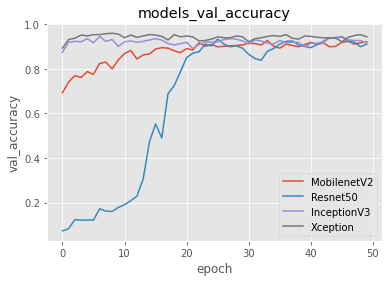

0.9210526347160339
0.9109311699867249
0.9149797558784485
0.9433198571205139


In [34]:
plt.style.use("ggplot")
plt.plot(history_mobilenetv2.history['val_accuracy'])
plt.plot(history_resnet50.history['val_accuracy'])
plt.plot(history_Xception.history['val_accuracy'])
plt.plot(history_Xception_true.history['val_accuracy'])
plt.title('models_val_accuracy')
plt.ylabel('val_accuracy')
plt.xlabel('epoch')
plt.legend(['MobilenetV2', 'Resnet50','InceptionV3','Xception'], loc='lower right')
plt.show()

print(history_mobilenetv2.history['val_accuracy'][49])
print(history_resnet50.history['val_accuracy'][49])
print(history_Xception.history['val_accuracy'][49])
print(history_Xception_true.history['val_accuracy'][49])

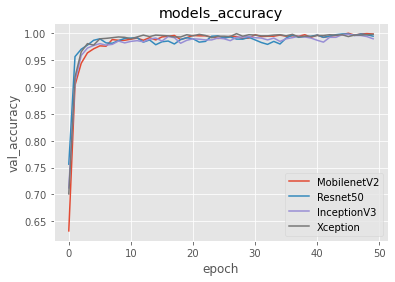

0.9210526347160339
0.9109311699867249
0.9149797558784485


In [33]:
plt.style.use("ggplot")
plt.plot(history_mobilenetv2.history['accuracy'])
plt.plot(history_resnet50.history['accuracy'])
plt.plot(history_Xception.history['accuracy'])
plt.plot(history_Xception_true.history['accuracy'])
plt.title('models_accuracy')
plt.ylabel('val_accuracy')
plt.xlabel('epoch')
plt.legend(['MobilenetV2', 'Resnet50','InceptionV3','Xception'], loc='lower right')
plt.show()

print(history_mobilenetv2.history['val_accuracy'][49])
print(history_resnet50.history['val_accuracy'][49])
print(history_Xception.history['val_accuracy'][49])